In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('../../../data/processed/Cleaned_AIS_data.csv')

In [3]:
X = df[['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 
                              'Status', 'TransceiverClass']]

In [4]:
# scale the values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [5]:
st = time.time()

In [6]:
clf = LocalOutlierFactor()
pred = clf.fit_predict(scaled_X)

In [7]:
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 3226.2490808963776 seconds


In [8]:
# see the frequence of each predicted label
pd.Series(pred).value_counts()

 1    10312528
-1     1115830
dtype: int64

In [9]:
# demension reduction with PCA so we can make plot
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaled_X)

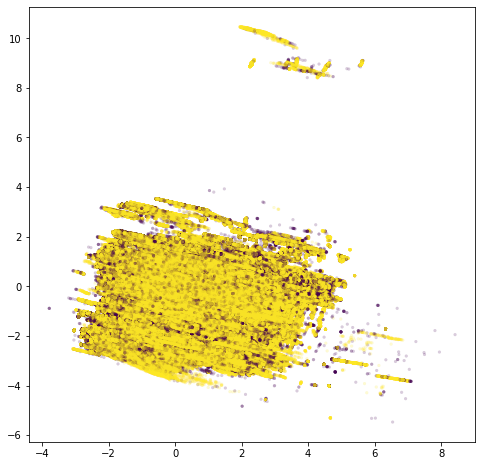

In [10]:
# plot the data
plt.figure(figsize=(8, 8))
plt.scatter(x=pca_X[:, 0], y=pca_X[:, 1], marker='.', linewidth=0.1, alpha=0.2, c=pred)